Importing liblaries 

In [20]:
import pandas as pd

In [21]:
import numpy as np 

In [22]:
import matplotlib.pyplot as plt

Importing data 

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/jivizcaino/PWT_10.0/main/pwt100.csv', encoding="latin-1")

In [24]:
print(df)

      countrycode   country   currency_unit  year        rgdpe        rgdpo  \
0             ABW     Aruba  Aruban Guilder  1950          NaN          NaN   
1             ABW     Aruba  Aruban Guilder  1951          NaN          NaN   
2             ABW     Aruba  Aruban Guilder  1952          NaN          NaN   
3             ABW     Aruba  Aruban Guilder  1953          NaN          NaN   
4             ABW     Aruba  Aruban Guilder  1954          NaN          NaN   
...           ...       ...             ...   ...          ...          ...   
12805         ZWE  Zimbabwe       US Dollar  2015  40141.61719  39798.64453   
12806         ZWE  Zimbabwe       US Dollar  2016  41875.20313  40963.19141   
12807         ZWE  Zimbabwe       US Dollar  2017  44672.17578  44316.74219   
12808         ZWE  Zimbabwe       US Dollar  2018  44325.10938  43420.89844   
12809         ZWE  Zimbabwe       US Dollar  2019  42296.06250  40826.57031   

             pop       emp  avh        hc  ...     

Variables we care about: 
- cgdpo (Output-side real GDP at current PPP) 
- emp (Number of persons engaged) 
- avh (Average annual hours worked by persons engaged) 
- hc (Human capital index based on yeatd of schooling and returns to education) 
- labsh (Country-specific measure for 1-alpha)

Cleanining the data 

In [25]:
df_subset =  df[['country', 'year', 'cgdpo', 'emp', 'avh', 'hc','labsh']]

In [26]:
df_subset

,country,year,cgdpo,emp,avh,hc,labsh
0,Aruba,1950,NaN,NaN,NaN,NaN,NaN
1,Aruba,1951,NaN,NaN,NaN,NaN,NaN
2,Aruba,1952,NaN,NaN,NaN,NaN,NaN
3,Aruba,1953,NaN,NaN,NaN,NaN,NaN
4,Aruba,1954,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
12805,Zimbabwe,2015,39455.90234,6.393752,NaN,2.584653,0.533381
12806,Zimbabwe,2016,40864.16406,6.504374,NaN,2.616257,0.533381
12807,Zimbabwe,2017,44316.74219,6.611773,NaN,2.648248,0.533381
12808,Zimbabwe,2018,43567.51172,6.714952,NaN,2.680630,0.533381


In [27]:
df_subset = df_subset.dropna()
print(df_subset)

            country  year         cgdpo        emp          avh        hc  \
350       Argentina  1950   50511.76563   6.608833  2034.000000  1.816503   
351       Argentina  1951   51700.11328   6.713252  2037.866753  1.830769   
352       Argentina  1952   47280.32813   6.819321  2041.740856  1.845147   
353       Argentina  1953   50378.66797   6.927065  2045.622325  1.859638   
354       Argentina  1954   52633.07422   7.036511  2049.511172  1.874243   
...             ...   ...           ...        ...          ...       ...   
12664  South Africa  2014  699348.06250  16.992683  2209.091467  2.675951   
12666  South Africa  2016  710312.50000  17.984968  2218.455068  2.762902   
12667  South Africa  2017  726021.00000  18.302843  2197.033263  2.809246   
12668  South Africa  2018  733319.37500  18.686357  2191.363362  2.857641   
12669  South Africa  2019  735067.06250  18.642710  2191.363362  2.908202   

          labsh  
350    0.441024  
351    0.441024  
352    0.441024  
353

finding most frequent year 

In [28]:
for i in range (2010,2020):
    print(df_subset[df_subset['year'] == i].describe())



         year         cgdpo         emp          avh         hc      labsh
count    61.0  6.100000e+01   61.000000    61.000000  61.000000  61.000000
mean   2010.0  1.382503e+06   37.335028  1863.188767   3.039355   0.540881
std       0.0  2.888074e+06  115.797666   254.344466   0.425599   0.076200
min    2010.0  1.079782e+04    0.162806  1395.367099   1.966098   0.353974
25%    2010.0  1.492411e+05    2.544923  1680.332565   2.705013   0.490423
50%    2010.0  3.792399e+05    6.733418  1840.668989   3.078655   0.548255
75%    2010.0  1.432651e+06   22.581518  2066.000660   3.346539   0.595915
max    2010.0  1.680064e+07  781.035522  2476.231460   3.703131   0.675814
         year         cgdpo         emp          avh         hc      labsh
count    61.0  6.100000e+01   61.000000    61.000000  61.000000  61.000000
mean   2011.0  1.456090e+06   37.714756  1861.830229   3.060398   0.538439
std       0.0  3.012386e+06  116.531736   250.545047   0.421185   0.077438
min    2011.0  1.113984e+

All countries for the latest 10 years of the dataset share the same number of observations except for 2014 and 2015 which have one less observations. Therefore, we shall use the most recent year to conduct our analysis so we have the most up to date data to analyse.

Data subset for year 2019 only 

In [29]:
df_2019 = df_subset[df_subset['year'] == 2019]

In [30]:
print(df_2019)

             country  year         cgdpo         emp          avh        hc  \
419        Argentina  2019  9.785588e+05   20.643215  1609.068998  3.096804   
629        Australia  2019  1.355143e+06   12.863174  1726.797659  3.549666   
699          Austria  2019  4.783293e+05    4.550281  1611.374223  3.381046   
909          Belgium  2019  5.236886e+05    4.921937  1586.430997  3.149034   
1189        Bulgaria  2019  1.503254e+05    3.420419  1645.246464  3.186015   
...              ...   ...           ...         ...          ...       ...   
11759         Turkey  2019  2.246182e+06   28.087334  1832.000000  2.514292   
11829         Taiwan  2019  1.100433e+06   11.500000  2085.135333  3.357651   
12109        Uruguay  2019  7.131098e+04    1.635379  1532.513740  2.776406   
12179  United States  2019  2.056603e+07  158.299591  1765.346390  3.749341   
12669   South Africa  2019  7.350671e+05   18.642710  2191.363362  2.908202   

          labsh  
419    0.543918  
629    0.571645

In [31]:
df_2019["Income_Per_Worker"] = df_2019['cgdpo'] / df_2019['emp']
Per_Hour_Worked = df_2019['emp']*df_2019['avh']
df_2019["Income_Per_Hour_Worked"] = df_2019['cgdpo'] / Per_Hour_Worked
df_2019["Income_Per_Unit_of_HCap"] = df_2019['cgdpo'] / df_2019['hc']
Per_Hour_Worked_HCap = Per_Hour_Worked*df_2019['hc']
df_2019["Income_Per_Hour_Of_HCap"] = df_2019['cgdpo'] / Per_Hour_Worked_HCap
print(df_2019)

             country  year         cgdpo         emp          avh        hc  \
419        Argentina  2019  9.785588e+05   20.643215  1609.068998  3.096804   
629        Australia  2019  1.355143e+06   12.863174  1726.797659  3.549666   
699          Austria  2019  4.783293e+05    4.550281  1611.374223  3.381046   
909          Belgium  2019  5.236886e+05    4.921937  1586.430997  3.149034   
1189        Bulgaria  2019  1.503254e+05    3.420419  1645.246464  3.186015   
...              ...   ...           ...         ...          ...       ...   
11759         Turkey  2019  2.246182e+06   28.087334  1832.000000  2.514292   
11829         Taiwan  2019  1.100433e+06   11.500000  2085.135333  3.357651   
12109        Uruguay  2019  7.131098e+04    1.635379  1532.513740  2.776406   
12179  United States  2019  2.056603e+07  158.299591  1765.346390  3.749341   
12669   South Africa  2019  7.350671e+05   18.642710  2191.363362  2.908202   

          labsh  Income_Per_Worker  Income_Per_Hour

C:\Users\agnes\AppData\Local\Temp\ipykernel_21840\1298831451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["Income_Per_Worker"] = df_2019['cgdpo'] / df_2019['emp']
C:\Users\agnes\AppData\Local\Temp\ipykernel_21840\1298831451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["Income_Per_Hour_Worked"] = df_2019['cgdpo'] / Per_Hour_Worked
C:\Users\agnes\AppData\Local\Temp\ipykernel_21840\1298831451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:

df_2019['Income_Per_Worker'].describe([0.1,0.9,0.05,0.95])
max = 219595.211602
df_2019.loc[df_2019['Income_Per_Worker'] == 18371.849166] 

sd = 36303.479249
np.log(sd*sd)

dataIPW = {'Country':[],
            'Statistics': ['Minimum','Maximum','5%','10%','50%','90%','95%','logvariance'],
            'Values': ['18371.849166','219595.211602','23559.622983','31758.382732','71907.514371','106398.892493','128644.065852', '20.999337725479588']
    }

df_IPWStat = pd.DataFrame(dataIPW)









In [32]:
df_success = df[['country','year','countrycode','cgdpo', 'emp', 'avh', 'hc','labsh','pop','cn','ctfp']]
df_success = df_success.dropna()
df_success = df_success[df_success['year'] == 2019]
df_success['alpha']= 1- df_success['labsh']
print(df_success)

             country  year countrycode         cgdpo         emp          avh  \
419        Argentina  2019         ARG  9.785588e+05   20.643215  1609.068998   
629        Australia  2019         AUS  1.355143e+06   12.863174  1726.797659   
699          Austria  2019         AUT  4.783293e+05    4.550281  1611.374223   
909          Belgium  2019         BEL  5.236886e+05    4.921937  1586.430997   
1189        Bulgaria  2019         BGR  1.503254e+05    3.420419  1645.246464   
...              ...   ...         ...           ...         ...          ...   
11759         Turkey  2019         TUR  2.246182e+06   28.087334  1832.000000   
11829         Taiwan  2019         TWN  1.100433e+06   11.500000  2085.135333   
12109        Uruguay  2019         URY  7.131098e+04    1.635379  1532.513740   
12179  United States  2019         USA  2.056603e+07  158.299591  1765.346390   
12669   South Africa  2019         ZAF  7.350671e+05   18.642710  2191.363362   

             hc     labsh  

In [33]:
df_success["Income_Per_Worker"] = df_success['cgdpo'] / df_success['emp']
Per_Hour_Worked = df_success['emp']*df_success['avh']
df_success["Income_Per_Hour_Worked"] = df_success['cgdpo'] / Per_Hour_Worked
df_success["Income_Per_Unit_of_HCap"] = df_success['cgdpo'] / df_success['hc']
Per_Hour_Worked_HCap = Per_Hour_Worked*df_success['hc']
df_success["Income_Per_Hour_Of_HCap"] = df_success['cgdpo'] / Per_Hour_Worked_HCap
df_success['Income_Per_Capita'] = df_success['cgdpo'] / df_success['pop']

logging the GDP per capita, per hour worker, per unit of human capital 

In [34]:
df_success['log_of_GDP_per_capita']= np.log(df_success['Income_Per_Capita'])
df_success['log_of_GDP_per_worker']= np.log(df_success['Income_Per_Worker'])
df_success['log_of_GDP_per_hour_worked']= np.log(df_success['Income_Per_Hour_Worked'])
df_success['log_of_GDP_per_unit_of_Hcap']= np.log(df_success['Income_Per_Unit_of_HCap'])


plotting the graphs 

In [ ]:
df_success.plot.scatter(x= 'log_of_GDP_per_capita', y = 'cn', title = 'Log of GDP per capita and capital')
df_success.plot.scatter(x= 'log_of_GDP_per_capita', y = 'hc', title = 'log of GDP per capita and human capital')
df_success.plot.scatter(x= 'log_of_GDP_per_capita', y = 'avh', title = 'log of GDP per capita and average hours worked')
df_success.plot.scatter(x= 'log_of_GDP_per_capita', y = 'alpha', title = 'log of GDP per capita and alpha')
df_success.plot.scatter(x= 'log_of_GDP_per_capita', y = 'ctfp', title = 'log of GDP per capita and A')
df_success.plot.scatter(x= 'log_of_GDP_per_worker', y = 'cn', title = 'log of GDP per worker and capital')
df_success.plot.scatter(x= 'log_of_GDP_per_worker', y = 'hc', title = 'log of GDP per worker and human capital')
df_success.plot.scatter(x= 'log_of_GDP_per_worker', y = 'avh', title = 'log of GDP per worker and average hours worked')
df_success.plot.scatter(x= 'log_of_GDP_per_worker', y = 'alpha', title = 'log of GDP per worker and alpha')
df_success.plot.scatter(x= 'log_of_GDP_per_worker', y = 'ctfp', title = 'log of GDP per worker and A')
df_success.plot.scatter(x= 'log_of_GDP_per_hour_worked', y = 'cn', title = 'log of GDP per hour worked and capital')
df_success.plot.scatter(x= 'log_of_GDP_per_hour_worked', y = 'hc', title = 'log of GDP per hour worked and human capital')
df_success.plot.scatter(x= 'log_of_GDP_per_hour_worked', y = 'avh', title = 'log of GDP per hour worked and average hour worked') 
df_success.plot.scatter(x= 'log_of_GDP_per_hour_worked', y = 'alpha', title = 'log of GDP per hour worked and average hour worked')
df_success.plot.scatter(x= 'log_of_GDP_per_hour_worked', y = 'ctfp', title = 'log of GDP per hour worked and A')
df_success.plot.scatter(x= 'log_of_GDP_per_unit_of_Hcap', y = 'cn', title = 'log of GDP per unit of human capital and capital')
df_success.plot.scatter(x= 'log_of_GDP_per_unit_of_Hcap', y = 'hc', title = 'log of GDP per unit of human capital and human capital') 
df_success.plot.scatter(x= 'log_of_GDP_per_unit_of_Hcap', y = 'avh', title = 'log of GDP per unit of human capital and average hour worked')
df_success.plot.scatter(x= 'log_of_GDP_per_unit_of_Hcap', y = 'alpha', title = 'log of GDP per unit of human capital and alpha')
df_success.plot.scatter(x= 'log_of_GDP_per_unit_of_Hcap', y = 'ctfp', title = 'log of GDP per unit of human capital and A')

KeyError: 0

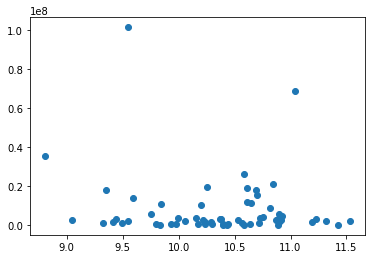

In [55]:

x = df_success['log_of_GDP_per_capita']
y = df_success['cn']
n = df_success['countrycode']
plt.scatter(x, y,)
for i, txt in enumerate(n):
    plt.text(x[i], y[i], txt)
plt.show()